# Homework: Data visualization and exploration with Pandas

Author: Alexandre Gramfort

### Data:

MovieLens 1M Data Set contain les grades given to movies by users on the Movielens website.

The data are available at:

https://www.dropbox.com/s/qrkmr9avt7rx821/ml-1m.zip?dl=0

and come from:

http://grouplens.org/datasets/movielens/

### Import necessary packages

In [123]:
import pandas as pd
import numpy as np

### Load the "users" data as Pandas DataFrame

In [124]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

In [125]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [126]:
users.shape

(6040, 5)

### Read the "rating"

In [127]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [128]:
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [129]:
ratings.shape

(1000209, 4)

### Read the movies

In [130]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None,
                     encoding='latin_1', names=mnames, engine='python')

In [131]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap],
    sep=<object object at 0x7fbfda3453d0>,
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True

In [139]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [140]:
movies.shape

(3883, 3)

### Let's merge everything as a single DataFrame

In [141]:
data = pd.merge(pd.merge(ratings, users), movies)

In [142]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [143]:
data.shape

(1000209, 10)

# Let's explore the data

### Question 1

How many movies have a grade higher than 4.5 ?
Is there a difference between Male or Females?

In [144]:
print(data[data['rating']>4.5].shape[0],'movies have a grade higher than 4.5')

226310 movies have a grade higher than 4.5


In [145]:
data['gender'].value_counts(normalize=True)

M    0.753611
F    0.246389
Name: gender, dtype: float64

In [148]:
data[data['rating']>4.5]['gender'].value_counts(normalize=True)

M    0.741302
F    0.258698
Name: gender, dtype: float64

We can see that there is around 75% of men and only 25% of women in the dataset

### Question 2

How many movies have a median grade higher than 4,5 among the men older than 30 years? And among the women older than 30?

In [149]:
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [150]:
data[(data['age']>30)&(data['gender']=='M')]['rating']>4.5

1           True
4           True
9           True
12         False
17          True
           ...  
1000183    False
1000187    False
1000195     True
1000203    False
1000205    False
Name: rating, Length: 293060, dtype: bool

In [151]:
new_data = data[(data['age']>30)&(data['gender']=='M')].groupby('movie_id').median()
new_data[new_data['rating']>4.5]['rating'].count()

86

### Question 3a

What are the most popular movies?

Hint: use the `DataFrame.nlargest` method.

In [154]:
mean_ratings = new_data.groupby('title')['rating'].mean()

# Get the top 10 movies by average rating
top_10 = mean_ratings.nlargest(10)

# Print the top 10 movies
print(top_10)

title
Baby, The (1973)                             5.0
Bittersweet Motel (2000)                     5.0
Follow the Bitch (1998)                      5.0
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Smashing Time (1967)                         5.0
Song of Freedom (1936)                       5.0
Ulysses (Ulisse) (1954)                      5.0
Name: rating, dtype: float64


In [155]:
data2 = pd.DataFrame(data.groupby('title')['rating'].count())
data2 = data2.rename(columns={"rating": "count"})
new_data = pd.merge(data2, data, on='title')

In [156]:
new_data.groupby('title').mean().nlargest(10, ['rating', 'count'])['rating']

title
Gate of Heavenly Peace, The (1995)           5.0
Smashing Time (1967)                         5.0
Baby, The (1973)                             5.0
Bittersweet Motel (2000)                     5.0
Follow the Bitch (1998)                      5.0
Lured (1947)                                 5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Song of Freedom (1936)                       5.0
Ulysses (Ulisse) (1954)                      5.0
Name: rating, dtype: float64

In [157]:
new_data.groupby('title').mean().nlargest(10, ['count', 'rating'])['rating']

title
American Beauty (1999)                                   4.317386
Star Wars: Episode IV - A New Hope (1977)                4.453694
Star Wars: Episode V - The Empire Strikes Back (1980)    4.292977
Star Wars: Episode VI - Return of the Jedi (1983)        4.022893
Jurassic Park (1993)                                     3.763847
Saving Private Ryan (1998)                               4.337354
Terminator 2: Judgment Day (1991)                        4.058513
Matrix, The (1999)                                       4.315830
Back to the Future (1985)                                3.990321
Silence of the Lambs, The (1991)                         4.351823
Name: rating, dtype: float64

### Question 3b

What are the most popular movies among the movies that have at least 30 grades? 

In [158]:
new_data[new_data['count']>30].groupby('title').mean().nlargest(10, ['rating', 'count'])['rating']

title
Sanjuro (1962)                                                         4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Name: rating, dtype: float64

### Question 3c

What is the movie with the highest number of ratings?

In [159]:
new_data.nlargest(1, 'count')

,title,count,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,genres
39061,American Beauty (1999),3428,2,2858,4,978298434,M,56,16,70072,Comedy|Drama


# Data Visualization

In [160]:
%matplotlib inline 

### Question 4

Show the histogram of the ratings.

<AxesSubplot:ylabel='Frequency'>

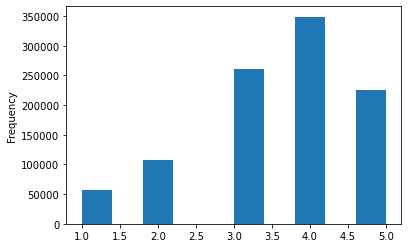

In [161]:
new_data['rating'].plot(kind='hist')

### Question 5

Show the histogram of the number of grades obtained for each movie.

<AxesSubplot:ylabel='Frequency'>

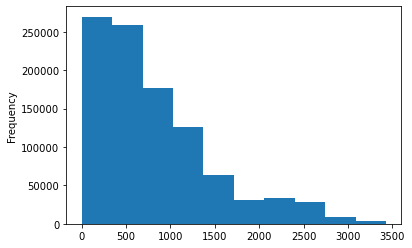

In [162]:
new_data['count'].plot(kind='hist')

### Question 6

Show the histogram of the mean grade for each movie.

Does the distribution of the grade depend on the gender of the user?

<AxesSubplot:ylabel='Frequency'>

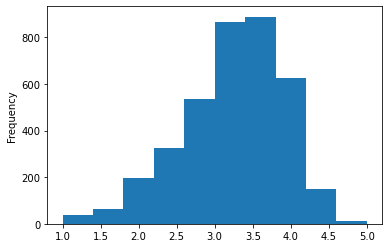

In [163]:
new_data.groupby('title')['rating'].mean().plot(kind='hist')

In [164]:
import matplotlib.pyplot as plt  # Module pour tracer les graphiques

m = new_data[new_data['gender']=='M'].groupby('title')['rating'].mean()
f = new_data[new_data['gender']=='F'].groupby('title')['rating'].mean()

(array([[ 46.,  63., 210., 350., 527., 862., 868., 579., 149.,  17.],
        [ 59.,  47., 156., 289., 437., 793., 791., 684., 186.,  39.]]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 2 BarContainer objects>)

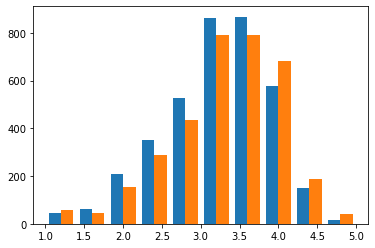

In [165]:
plt.hist([m,f])

It doesn't depend too much of the gender

### Question 7

Show the histogram of grades among the movies that have been graded at least 30 times.

<AxesSubplot:ylabel='Frequency'>

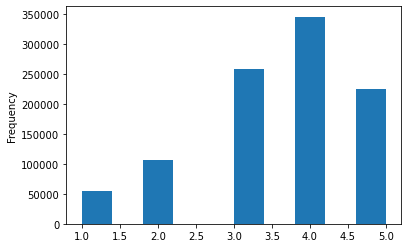

In [166]:
new_data[new_data['count']>30]['rating'].plot(kind='hist')

### Question 8

Show as "scatter plot" the mean grades for the men vs the grades of the women.

Now restrict the plot to the movies with at least 100 grades.

In [167]:
new_data

,title,count,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,genres
0,"$1,000,000 Duck (1971)",37,216,2031,2,976867230,M,45,13,52761,Children's|Comedy
1,"$1,000,000 Duck (1971)",37,494,2031,5,976215651,F,35,0,17870,Children's|Comedy
2,"$1,000,000 Duck (1971)",37,714,2031,4,975782711,M,18,4,76013,Children's|Comedy
3,"$1,000,000 Duck (1971)",37,869,2031,1,999376619,M,18,20,92026,Children's|Comedy
4,"$1,000,000 Duck (1971)",37,1034,2031,3,975093319,F,35,1,82601,Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...,...
1000204,eXistenZ (1999),410,5961,2600,4,957023457,F,45,0,78757,Action|Sci-Fi|Thriller
1000205,eXistenZ (1999),410,5964,2600,5,956996314,M,18,5,97202,Action|Sci-Fi|Thriller
1000206,eXistenZ (1999),410,6001,2600,4,1004811365,F,25,7,94117,Action|Sci-Fi|Thriller
1000207,eXistenZ (1999),410,6016,2600,4,956777672,M,45,1,37209,Action|Sci-Fi|Thriller


In [117]:
data3.groupby('title').mean()

,count,user_id,movie_id,rating,timestamp,age,occupation
title,,,,,,,
"'burbs, The (1989)",303.0,2954.333333,2072.0,2.910891,9.718751e+08,27.897690,8.148515
...And Justice for All (1979),199.0,3173.246231,3420.0,3.713568,9.707617e+08,35.984925,8.010050
10 Things I Hate About You (1999),700.0,2905.715714,2572.0,3.422857,9.737536e+08,23.627143,7.557143
101 Dalmatians (1961),565.0,3102.224779,2085.0,3.596460,9.721887e+08,28.481416,7.676106
101 Dalmatians (1996),364.0,3073.873626,1367.0,3.046703,9.717782e+08,28.197802,7.060440
...,...,...,...,...,...,...,...
Young Guns II (1990),369.0,3049.409214,1379.0,2.907859,9.710579e+08,26.780488,7.672087
Young Sherlock Holmes (1985),379.0,3187.981530,2414.0,3.390501,9.702421e+08,31.261214,8.203166
Your Friends and Neighbors (1998),109.0,2973.422018,2165.0,3.376147,9.747965e+08,24.972477,7.449541


In [168]:
data3 = pd.DataFrame(new_data.groupby('title')['rating'].mean())
data3 = data3.rename(columns={"rating": "avg_rating"})
new_data2 = pd.merge(data3, new_data, on='title')

### Question Bonus

Make nice data visualization to highligh a specific effect in the data.